In [116]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [32]:
!pip install h5py
!pip install h5pyViewer
!python -m pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 74 kB 752 kB/s 
     |████████████████████████████████| 74 kB 2.7 MB/s 
     |████████████████████████████████| 74 kB 1.7 MB/s 
     |████████████████████████████████| 74 kB 2.9 MB/s 
     |████████████████████████████████| 74 kB 3.2 MB/s 
     |████████████████████████████████| 73 kB 1.5 MB/s 
     |████████████████████████████████| 73 kB 2.6 MB/s 
     |████████████████████████████████| 73 kB 2.9 MB/s 
     |████████████████████████████████| 73 kB 2.1 MB/s 
     |████████████████████████████████| 75 kB 4.0 MB/s 
     |████████████████████████████████| 68 kB 7.6 MB/s 
     |████████████████████████████████| 68 kB 5.5 MB/s 
     |████████████████████████████████| 67 kB 4.4 MB/s 
     |████████████████████████████████| 66 kB 4.2 MB/s 
     |████████████

In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer  
from nltk.corpus import wordnet
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Activation, Dense, Dropout, Embedding, BatchNormalization
from keras.preprocessing import sequence
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
%matplotlib inline



Note :  Upload the dataset from your local memory 
 

In [118]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

 Check head and info of the data


In [119]:
train.head(10)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


In [120]:
train.info

<bound method DataFrame.info of          id keyword location  \
0         1     NaN      NaN   
1         4     NaN      NaN   
2         5     NaN      NaN   
3         6     NaN      NaN   
4         7     NaN      NaN   
...     ...     ...      ...   
7608  10869     NaN      NaN   
7609  10870     NaN      NaN   
7610  10871     NaN      NaN   
7611  10872     NaN      NaN   
7612  10873     NaN      NaN   

                                                   text  target  
0     Our Deeds are the Reason of this #earthquake M...       1  
1                Forest fire near La Ronge Sask. Canada       1  
2     All residents asked to 'shelter in place' are ...       1  
3     13,000 people receive #wildfires evacuation or...       1  
4     Just got sent this photo from Ruby #Alaska as ...       1  
...                                                 ...     ...  
7608  Two giant cranes holding a bridge collapse int...       1  
7609  @aria_ahrary @TheTawniest The out of control w...

 Is there a missing data [how many and the precentage if there]?


In [121]:
print(train.isna()) 

         id  keyword  location   text  target
0     False     True      True  False   False
1     False     True      True  False   False
2     False     True      True  False   False
3     False     True      True  False   False
4     False     True      True  False   False
...     ...      ...       ...    ...     ...
7608  False     True      True  False   False
7609  False     True      True  False   False
7610  False     True      True  False   False
7611  False     True      True  False   False
7612  False     True      True  False   False

[7613 rows x 5 columns]


In [122]:
nan_percent = train.isna().mean().round(4)*100
print(nan_percent)


id           0.00
keyword      0.80
location    33.27
text         0.00
target       0.00
dtype: float64


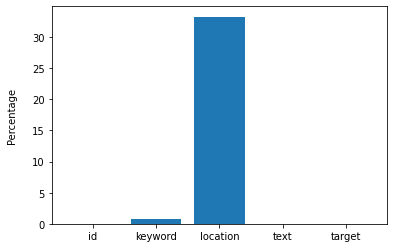

In [123]:
plt.bar(nan_percent.keys(), nan_percent)
plt.ylabel('Percentage', labelpad=15)
plt.show()

In [124]:
train.dropna(inplace = True)

 How many data in each class ?

0    2884
1    2196
Name: target, dtype: int64


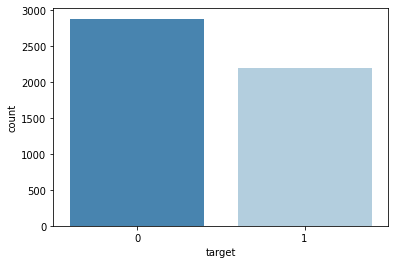

In [125]:
sns.countplot(data=train,x='target',palette='Blues_r');
print(train.target.value_counts())

Clean Text from unnecessary symbols / URLs

In [126]:
def clean_text(text):
  
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

train['text'] = train['text'].apply(lambda x: clean_text(x))
test['text'] = test['text'].apply(lambda x: clean_text(x))
train['text'].head(10)

31                     bbcmtd wholesale markets ablaze 
32           we always try to bring the heavy metal rt 
33    africanbaze breaking newsnigeria flag set abla...
34                    crying out for more set me ablaze
35    on plus side look at the sky last night it was...
36    phdsquares mufc theyve built so much hype arou...
37                     inec office in abia set ablaze  
39                                ablaze for you lord d
40                             check these out     nsfw
42    had an awesome time visiting the cfc head offi...
Name: text, dtype: object

most common 15 location

In [127]:
location = train.location.value_counts()[:15].reset_index()
location.columns = ['location','frequency']
location

,location,frequency
0,USA,104
1,New York,71
2,United States,50
3,London,45
4,Canada,29
5,Nigeria,28
6,UK,27
7,"Los Angeles, CA",26
8,India,24
9,Mumbai,22


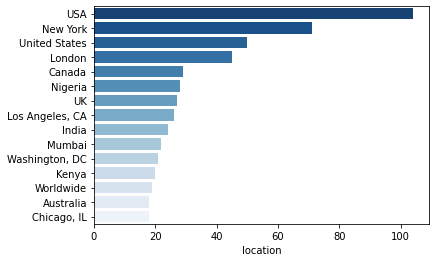

In [128]:
sns.barplot(y = train['location'].value_counts()[:15].index, x = train['location'].value_counts()[:15],
            palette='Blues_r', orient='h')

most common 15 keyword

In [129]:
Keywords = train.keyword.value_counts()[:15].reset_index()
Keywords.columns = ['keyword','frequency']
Keywords

,keyword,frequency
0,collision,36
1,whirlwind,33
2,armageddon,32
3,fatalities,32
4,flames,31
5,emergency%20plan,31
6,derailed,31
7,outbreak,31
8,sandstorm,31
9,danger,30


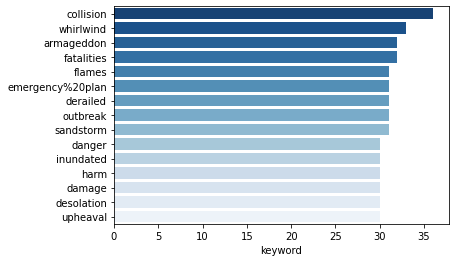

In [130]:
sns.barplot(y = train['keyword'].value_counts()[:15].index, x = train['keyword'].value_counts()[:15],
            palette='Blues_r', orient='h')

In [184]:
Tweet = train['text'].tolist()
Target = train['target'].values

In [134]:
nltk.download("stopwords")                      
nltk.download("words")
nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download("wordnet")  
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [135]:
stops = set(stopwords.words('english'))
english_words = set(nltk.corpus.words.words())

In [136]:
Tweet[:3]

['bbcmtd wholesale markets ablaze ',
 'we always try to bring the heavy metal rt ',
 'africanbaze breaking newsnigeria flag set ablaze in aba ']

In [150]:
lem = WordNetLemmatizer()
def process(Tweet):
  Tweets = ' '
  for word in Tweet.split():
     if word in english_words and word not in stops and word.isalpha() :
       Tweets = Tweets + ' ' + word
  Lemm_Tweets = ' '     
  for word in Tweets.split():
    Lemm_Tweets = Lemm_Tweets + ' ' + lem.lemmatize(word) 
  return Lemm_Tweets

In [138]:
Tweets_data = []

for i in range(len(Tweet)):
    x = process(Tweet[i])
    Tweets_data.append(x)
Tweets_data[:3]

['  wholesale ablaze',
 '  always try bring heavy metal',
 '  breaking flag set ablaze aba']

In [151]:
tokens = Tokenizer(oov_token='<OOV>')  

tokens.fit_on_texts(Tweets_data)   
word_index = tokens.word_index
Tweet_num = tokens.texts_to_sequences(Tweets_data)          
Tweets_padded = pad_sequences(Tweet_num, padding='post', truncating='post')                
Tweets_padded = np.array(Tweets_padded)

In [152]:
vocab_size = max(list(tokens.word_index.values()))+1
out_size = 300

In [165]:
model = Sequential()
model.add(Embedding(vocab_size, out_size))

model.add(Dropout(0.5))
model.add(LSTM(64, dropout=0.5, recurrent_dropout=0.2, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(32, activation='relu'))

model.add(Dense(1, activation = 'sigmoid'))

In [166]:
model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_16 (Embedding)    (None, None, 300)         1543800   
                                                                 
 dropout_33 (Dropout)        (None, None, 300)         0         
                                                                 
 lstm_26 (LSTM)              (None, None, 64)          93440     
                                                                 
 dropout_34 (Dropout)        (None, None, 64)          0         
                                                                 
 lstm_27 (LSTM)              (None, 128)               98816     
                                                                 
 dense_22 (Dense)            (None, 32)                4128      
                                                                 
 dense_23 (Dense)            (None, 1)               

In [33]:
import h5py
arr = np.random.randn(1000)
with h5py.File('best.hdf5', 'w') as f:
    dset = f.create_dataset("default", data = arr)

In [43]:
early_stop = EarlyStopping(monitor='val_loss',
                           patience=5,
                           mode='min',
                           restore_best_weights=True,
                           verbose=1)

In [44]:
checkpointer = ModelCheckpoint(filepath='best.hdf5',
                               verbose=1,
                               save_best_only=True)

In [45]:
reduce_learning = ReduceLROnPlateau(monitor='val_loss',
                                    patience=3,
                                    factor=0.5,
                                    verbose=1,
                                    min_lr=0.00001) 

In [162]:
x_train, x_test, y_train, y_test = train_test_split(Tweets_padded,Target, test_size = 0.3)

In [167]:
model.fit(Tweets_padded,
          Target,
          epochs=50,
          batch_size=200,
          validation_split=0.2,
          verbose=1,
          callbacks=[early_stop, checkpointer, reduce_learning])

Epoch 1/50
21/21 [==============================] - ETA: 0s - loss: 0.6831 - accuracy: 0.5696
Epoch 1: val_loss did not improve from 0.56584
21/21 [==============================] - 9s 203ms/step - loss: 0.6831 - accuracy: 0.5696 - val_loss: 0.6888 - val_accuracy: 0.5413 - lr: 0.0010
Epoch 2/50
21/21 [==============================] - ETA: 0s - loss: 0.6362 - accuracy: 0.6373
Epoch 2: val_loss did not improve from 0.56584
21/21 [==============================] - 4s 171ms/step - loss: 0.6362 - accuracy: 0.6373 - val_loss: 0.6716 - val_accuracy: 0.7037 - lr: 0.0010
Epoch 3/50
21/21 [==============================] - ETA: 0s - loss: 0.4425 - accuracy: 0.8012
Epoch 3: val_loss improved from 0.56584 to 0.55502, saving model to best.hdf5
21/21 [==============================] - 4s 190ms/step - loss: 0.4425 - accuracy: 0.8012 - val_loss: 0.5550 - val_accuracy: 0.7224 - lr: 0.0010
Epoch 4/50
21/21 [==============================] - ETA: 0s - loss: 0.3503 - accuracy: 0.8509
Epoch 4: val_loss di

In [169]:
print("Evaluate on test data")
results = model.evaluate(x_test, y_test, batch_size=128)
print("test loss, test acc:", results)

Evaluate on test data
12/12 [==============================] - 0s 14ms/step - loss: 0.3886 - accuracy: 0.8281
test loss, test acc: [0.3886110484600067, 0.8280839920043945]


In [170]:
y_test=model.predict(x_test).flatten()
y_test


array([0.81095934, 0.5557244 , 0.96452755, ..., 0.9197121 , 0.10830424,
       0.08306824], dtype=float32)

In [171]:
def get_the_predict (list1):
  new_list=[]
  for i in range(len(list1)):
    if list1[i]>.5:
      new_list.append(1)
    else:
      new_list.append(0)
  return new_list

In [174]:
y_test = np.array(get_the_predict(y_test))
predictions = np.where(y_test >= 0.9,1,0)
predictions

array([1, 1, 1, ..., 1, 0, 0])

In [186]:
df = pd.DataFrame(list(predictions), columns=['Prediction'])
df.tail(100)

,Prediction
1424,0
1425,1
1426,1
1427,0
1428,1
...,...
1519,0
1520,1
1521,1
1522,0


In [ ]:
for i in range(len(Tweet)):
  print(Tweet)
  print('is this a disaster tweet ? ')
  if df['Prediction'].item == 1:
    print('Yes it is a real disaster tweet')
  else:
    print('No it is not a real disaster tweet')
